In [2]:
import matplotlib.pyplot as plt
import numpy as np
import itk
from itkwidgets import view
import SimpleITK as sitk
from skimage import img_as_ubyte
import raster_geometry as rg
from vpython import sphere
# from matplotlib.patches import Circle
# import mpl_toolkits.mplot3d.art3d as art3d

<IPython.core.display.Javascript object>

In [3]:
input_skeleton6 = r"D:\Cecile\VascuSynth\Group6\Group6\data6\skeleton.tif"
skeleton_itk6 = itk.imread(input_skeleton6)
#print(skeleton_itk)
input_dm6 = r"D:\Cecile\VascuSynth\Group6\Group6\data6\Triangle_segm_DM.tif"
dm_itk6 = itk.imread(input_dm6)
#print(dm_itk)
input_segm6 = r"D:\Cecile\VascuSynth\Group6\Group6\data6\Triangle_segm.tif"
segm_itk6 = itk.imread(input_segm6)
#print(segm_itk)

input_skeleton12 = r"D:\Cecile\VascuSynth\Group6\Group6\data12\skeleton_testVascuSynth12_101_101_101_uchar.tif"
skeleton_itk12 = itk.imread(input_skeleton12)
#print(skeleton_itk)
input_dm12 = r"D:\Cecile\VascuSynth\Group6\Group6\data12\EDT.tif"
dm_itk12 = itk.imread(input_dm12)
#print(dm_itk)
input_segm12 = r"D:\Cecile\VascuSynth\Group6\Group6\data12\MASK_testVascuSynth12_101_101_101_uchar.tif"
segm_itk12 = itk.imread(input_segm12)

In [9]:
size = itk.size(skeleton_itk12)
size6 = itk.size(skeleton_itk6)

width = size[0]
height = size[1]
slices = size[2]
print(width, height, slices, size6)

101 101 101 itkSize3 ([101, 101, 101])


In [5]:
proj_skeleton = itk.maximum_projection_image_filter(skeleton_itk)
np_view_skeleton = itk.array_view_from_image(proj_skeleton)
proj_dm = itk.maximum_projection_image_filter(dm_itk)
np_view_dm = itk.array_view_from_image(proj_dm)
proj_segm = itk.maximum_projection_image_filter(segm_itk)
np_view_segm = itk.array_view_from_image(proj_segm)
plt.figure(figsize=(17,17))
plt.subplot(1,3,1)
plt.imshow(np_view_skeleton[0])
plt.subplot(1,3,2)
plt.imshow(np_view_dm[0])
plt.subplot(1,3,3)
plt.imshow(np_view_segm[0])
plt.show()

NameError: name 'skeleton_itk' is not defined

In [6]:
array_skeleton6 = itk.array_view_from_image(skeleton_itk6)
array_dm6 = itk.array_view_from_image(dm_itk6)
array_segm6 = itk.array_view_from_image(segm_itk6)
print(array_skeleton6.shape)
print(array_dm6.shape)

array_skeleton12 = itk.array_view_from_image(skeleton_itk12)
array_dm12 = itk.array_view_from_image(dm_itk12)
array_segm12 = itk.array_view_from_image(segm_itk12)

(101, 101, 101)
(101, 101, 101)


In [7]:
view(array_dm)

NameError: name 'array_dm' is not defined

In [10]:
diam6 = np.zeros((slices, height, width))

In [11]:
array_skeleton6 = itk.array_view_from_image(skeleton_itk6)
for y in range(height):
    for x in range(width):
        for z in range(slices):
            skeleton6 = array_skeleton6[z,y,x]
            if skeleton6 != 0:
                diam6[z,y,x] = array_dm6[z,y,x]               

In [12]:
diam12 = np.zeros((slices, height, width))

In [13]:
array_skeleton12 = itk.array_view_from_image(skeleton_itk12)
for y in range(height):
    for x in range(width):
        for z in range(slices):
            skeleton12 = array_skeleton12[z,y,x]
            if skeleton12 != 0:
                diam12[z,y,x] = array_dm12[z,y,x]  

In [14]:
print(array_dm6.max(),array_dm6.min())
print(diam6.max(),diam6.min())
print(diam6.shape)

3.0 0.0
3.0 0.0
(101, 101, 101)


In [15]:
diam_255 = diam*(255/array_dm.max())
view(diam)
print(diam.max())

NameError: name 'diam' is not defined

In [78]:
print(diam_255.max())

255.0


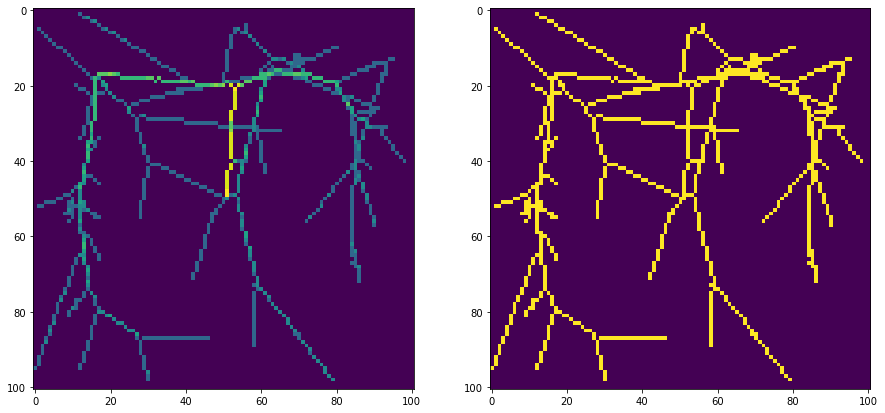

3.0


In [79]:
diam_itk = itk.image_from_array(diam)
proj_diam = itk.maximum_projection_image_filter(diam_itk)
np_view_diam = itk.array_view_from_image(proj_diam)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(np_view_diam[0])
plt.subplot(1,2,2)
plt.imshow(np_view_skeleton[0])
plt.show()
print(diam.max())

In [80]:
view(diam)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [96]:
count_diam6 = 0
for y in range(height):
    for x in range(width):
        for z in range(slices):
            diam_intensity6 = diam6[z,y,x]
            if diam_intensity6 != 0:
                count_diam6 = count_diam6 +1
print(count_diam6)
print(diam6.max())

656
3.0


In [82]:
count_skel = 0
for y in range(height):
    for x in range(width):
        for z in range(slices):
            skel_intensity = array_skeleton[z,y,x]
            if skel_intensity != 0:
                count_skel = count_skel+1
print(count_skel)
print(diam.max())

1102
3.0


In [83]:
diam_only = []
for y in range(height):
    for x in range(width):
        for z in range(slices):
            if diam[z,y,x] != 0:
                diam_only.append([z,y,x])

# print(diam_only)
# print(diam[14,3,11])
# print(len(diam_only))
# print(diam_only[2][0])

In [84]:
import pandas as pd
diam_list = []
for y in range(height):
    for x in range(width):
        for z in range(slices):
            if diam[z,y,x] != 0:
                diam_list.append(diam[z,y,x])
diam_array = np.array(diam_list)
print(diam_array.shape)

df = pd.DataFrame(diam_array)
df.to_excel(excel_writer = r"D:\Cecile\VascuSynth\Group6\Group6\data6\diam_anal.xlsx")

(1102,)


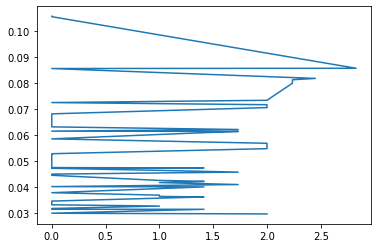

56 56
0.0
67.52901215184573
0.0
45.035922608818595
0.0
0.0
30.630873469987872
0.0
0.0
0.0
39.10934688872833
39.10707576805486
27.499271269311365
27.32904996023623
27.13394945487896
0.0
35.31305107558351
0.0
42.301577384501485
23.976215594130622
33.58251736267111
33.50653179606893
23.511653551082592
0.0
0.0
0.0
0.0
37.865571901631725
21.549030509117397
0.0
29.863576123090745
0.0
0.0
0.0
0.0
0.0
0.0
36.50534346965037
35.17485420022934
0.0
23.201552959635737
28.19556562002589
0.0
27.85744829525502
0.0
0.0
28.31918554022386
27.880393113542905
0.0
27.232188446744054
27.938382625880703
27.481838207813407
29.916483042058374
0.0
32.96900095394853
0.0
0.0
[2.0, 0.0, 1.4142135381698608, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.4142135381698608, 1.4142135381698608, 1.0, 1.0, 1.0, 0.0, 1.4142135381698608, 0.0, 1.7320507764816284, 1.0, 1.4142135381698608, 1.4142135381698608, 1.0, 0.0, 0.0, 0.0, 0.0, 1.7320507764816284, 1.0, 0.0, 1.4142135381698608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.414213538169

In [18]:
#node12

import pandas as pd


import statistics

ratios = []

my_data12 = [diam12[48,19,41],diam12[39,17,83],diam12[35,48,10],diam12[23,28,88],diam12[24,30,90],diam12[83,17,67],diam12[21,6,56],
diam12[12,22,15],diam12[87,53,48],diam12[24,13,63],diam12[14,47,87],diam12[82,17,64],diam12[68,32,84],diam12[28,60,84],diam12[14,40,31],
diam12[61,27,84],diam12[28,13,68],diam12[78,17,61],diam12[83,53,14],diam12[80,81,66],diam12[20,40,85],diam12[27,59,84],diam12[16,28,27],
diam12[31,37,85],diam12[72,50,12],diam12[39,19,80],diam12[48,86,27],diam12[48,37,14],diam12[17,25,24],diam12[87,72,59],diam12[25,30,89],
diam12[34,79,17],diam12[26,29,88],diam12[18,21,19],diam12[32,73,14],diam12[87,48,53],diam12[85,27,59],diam12[29,63,13],diam12[31,58,13],
diam12[30,28,85],diam12[33,46,12],diam12[77,17,62],diam12[34,42,13],diam12[36,33,15],diam12[38,19,79],diam12[36,32,15],diam12[34,18,16],
diam12[42,17,73],diam12[51,16,64],diam12[33,17,17],diam12[48,19,42],diam12[52,20,50],diam12[52,19,56],diam12[52,20,54],diam12[52,20,53],
diam12[51,40,52]]

rad = [0.0296169000000000,0.0298797000000000,0.0314019000000000,0.0314075000000000,0.0317071000000000,0.0326468000000000,0.0331417000000000,
0.0336913000000000,0.0345632000000000,0.0361605000000000,0.0361626000000000,0.0363646000000000,0.0365911000000000,0.0368542000000000,
0.0378019000000000,0.0400479000000000,0.0401506000000000,0.0409453000000000,0.0417080000000000,0.0421116000000000,0.0422071000000000,
0.0425321000000000,0.0445161000000000,0.0445492000000000,0.0449625000000000,0.0449640000000000,0.0457421000000000,0.0464058000000000,
0.0472218000000000,0.0473558000000000,0.0474843000000000,0.0496826000000000,0.0516824000000000,0.0523593000000000,0.0526883000000000,
0.0528347000000000,0.0547865000000000,0.0568588000000000,0.0585630000000000,0.0609534000000000,0.0614299000000000,0.0615424000000000,
0.0621755000000000,0.0631898000000000,0.0682110000000000,0.0706235000000000,0.0717350000000000,0.0725643000000000,0.0734425000000000,
0.0800357000000000,0.0813653000000000,0.0818776000000000,0.0856910000000000,0.0857905000000000,0.105682000000000,0.105855000000000]
plt.plot(my_data12, rad)
plt.show()

print(len(rad), len(my_data12))
#ratios = [0.0]* len(vascu)
#print(ratios)

ratio_sum = 0
print(my_data12[38])

for i in range(len(my_data12)):
    #print(i)
#     zero = my_data12[i]
#     if zero == 0:
#         my_data12.remove(my_data12[i])
#         rad.remove(rad[i])
#     else:
    ratio = my_data12[i]/rad[i]
    print(ratio)
    ratio_sum += ratio
    ratios.append(ratio)
print(my_data12, len(my_data12))

mean = ratio_sum/len(my_data12)
print(mean)
print(len(rad), len(my_data12))

# diam_list = []
# for y in range(height):
#     for x in range(width):
#         for z in range(slices):
#             if diam[z,y,x] != 0:
#                 diam_list.append(diam[z,y,x])
# diam_array = np.array(diam_list)
# print(diam_array.shape)

ratios_array = np.array(ratios)
my_data_array12 = np.array(my_data12)

df = pd.DataFrame(my_data_array12)
df.to_excel(excel_writer = r"D:\Cecile\VascuSynth\Group6\Group6\data6\My_data12.xlsx")

In [102]:
print(diam12[36,33,15])

0.0


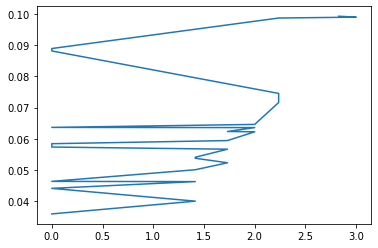

26 26
0.0
35.274119793422166
0.0
30.521232970253
0.0
28.212667014514377
33.083952394154096
26.288402656881463
26.129139349823756
30.552644022416878
0.0
0.0
0.0
29.134824960371883
32.127275414281215
27.77596385512707
31.44980453946479
0.0
30.952373582768193
31.225944260454998
30.004629513542604
0.0
0.0
22.674954979315313
30.333609032135428
28.516509214439612
[0.0, 1.4142135381698608, 0.0, 1.4142135381698608, 0.0, 1.4142135381698608, 1.7320507764816284, 1.4142135381698608, 1.4142135381698608, 1.7320507764816284, 0.0, 0.0, 0.0, 1.7320507764816284, 2.0, 1.7320507764816284, 2.0, 0.0, 2.0, 2.2360680103302, 2.2360680103302, 0.0, 0.0, 2.2360680103302, 3.0, 2.8284270763397217] 26 26
19.394540290514108


In [19]:
#node


import statistics

ratios6 = []
my_data6 = [diam6[86,6,43],diam6[77,14,9],diam6[88,22,44],diam6[69,17,15],diam6[64,46,17],diam6[81,19,46],diam6[11,34,68],diam6[79,54,89],
diam6[64,26,18],diam6[13,22,69],diam6[78,21,84],diam6[29,15,49],diam6[32,16,47],diam6[81,15,74],diam6[83,13,67],diam6[41,18,43],
diam6[47,20,45],diam6[70,18,18],diam6[69,13,31],diam6[77,15,47],diam6[72,13,44],diam6[64,16,43],diam6[55,21,45],diam6[51,24,45],
diam6[46,33,47],diam6[49,42,50]]
ref6 = [0.0360087000000000,0.0400921000000000,0.0441752000000000,0.0463354000000000,0.0464069000000000,0.0501269000000000,
0.0523532000000000,0.0537961000000000,0.0541240000000000,0.0566907000000000,0.0573880000000000,0.0579536000000000,
0.0584474000000000,0.0594495000000000,0.0622524000000000,0.0623579000000000,0.0635934000000000,0.0636636000000000,
0.0646154000000000,0.0716093000000000,0.0745241000000000,0.0880947000000000,0.0888670000000000,0.0986140000000000,
0.0989002000000000,0.0991856000000000]
plt.plot(my_data6, ref6)
plt.show()

#ratios = [0.0]* len(vascu)
#print(ratios)

print(len(ref6), len(my_data6))
ratio_sum6 = 0

for i in range(len(my_data6)):
#     print(i)
#     if my_data6[i] == 0:
#         my_data6.remove(my_data6[i])
#         ref6.remove(ref6[i])
#     else:
        ratio6 = my_data6[i]/ref6[i]
        print(ratio6)
        ratio_sum6 += ratio6
        ratios6.append(ratio6)
print(my_data6, len(my_data6),len(ref6))

mean = ratio_sum6/len(my_data6)
print(mean)

my_data_array6 = np.array(my_data6)

df = pd.DataFrame(my_data_array6)
df.to_excel(excel_writer = r"D:\Cecile\VascuSynth\Group6\Group6\data6\My_data6.xlsx")

In [87]:
print(diam[35,48,10])

1.4142135381698608


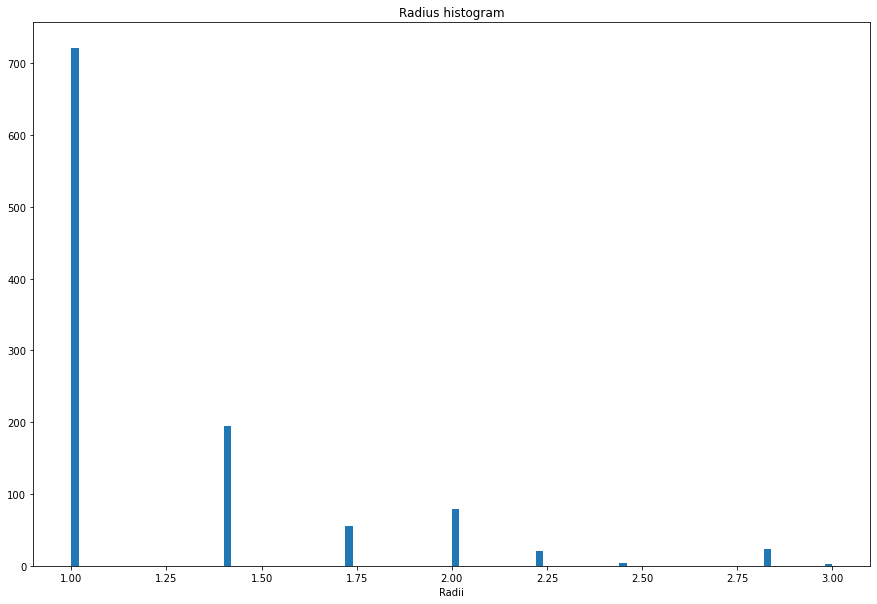

In [85]:
#Histogramme des diamètres
plt.figure(figsize=(15,10))
plt.hist(diam_list, 100)
plt.title('Radius histogram')
plt.xlabel("Radii")
plt.show()

In [16]:
#Prendre chaque voxel non nul dans la segmentation et lui assigner la valeur du
#voxel le plus proche dans sqeulette avec les valeurs de diamètres

import math

array_diam_segm = np.zeros((slices, height, width))
for y in range(height):
    for x in range(width):
        for z in range(slices):
            segm_intensity = array_segm[z,y,x]
            if segm_intensity != 0:
                dist_min = math.sqrt((slices)**2+(height)**2 + (width)**2)
                point_diam = (z,y,x)
                for k in range (len(diam_only)):
                    dist = math.sqrt((z - diam_only[k][0])**2+(y - diam_only[k][1])**2 + (x - diam_only[k][2])**2)
                    if dist < dist_min:
                        dist_min = dist
                        point_z = diam_only[k][0]
                        point_y = diam_only[k][1]
                        point_x = diam_only[k][2]
                #print(dist_min, point_diam)
                #print(diam[point_z,point_y,point_x])
                array_diam_segm[z,y,x] = diam[point_z,point_y,point_x]
                
#                 dist = itk.EuclideanDistanceMetric[[z,y,x].astype(itk.F)]
#                 #dist = itk.EuclideanDistanceMetric[itk.Vector[itk.F,3]].New([z,y,x])
#                 print(dist.type)
#                 array_segm[z,y,x] = array_dm[min(dist)]

In [17]:
view(array_diam_segm)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [53]:
view(array_segm)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageUC3; pr…

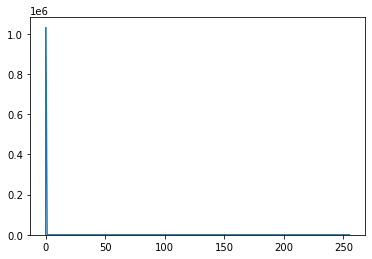

3.0


In [195]:
h = [(diam==v).sum() for v in range(256)]
plt.figure()
plt.plot(h)
plt.bar(range(256),h)
plt.show()
print(diam.max())

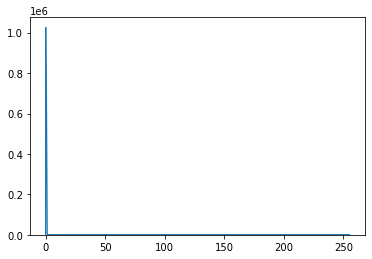

3.0


In [196]:
h = [(array_dm==v).sum() for v in range(256)]
plt.figure()
plt.plot(h)
plt.bar(range(256),h)
plt.show()
print(diam.max())

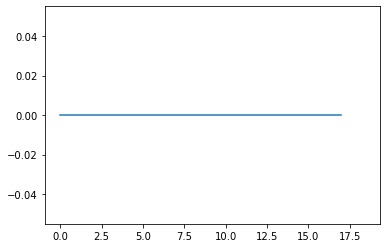

0.03529411764705882


In [181]:
# diam = diam*(array_dm.max()/255)
# h = [(diam==v).sum() for v in range(1,19)]
# plt.figure()
# plt.plot(h)
# plt.bar(range(1,19),h)
# plt.show()
# print(diam.max())

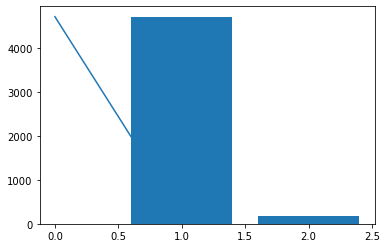

In [139]:
# diam = diam*(array_dm.max()/255)
h = [(array_dm==v).sum() for v in range(1,3)]
plt.figure()
plt.plot(h)
plt.bar(range(1,3),h)
plt.show()

In [10]:
hess_matrix = itk.HessianRecursiveGaussianImageFilter(skeleton_itk, sigma=2)

In [141]:
print(hess_matrix.shape)
print(hess_matrix)

(101, 101, 101, 6)
Image (0000025D9A926B40)
  RTTI typeinfo:   class itk::Image<class itk::SymmetricSecondRankTensor<double,3>,3>
  Reference Count: 1
  Modified Time: 1411
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 3416
  UpdateMTime: 1407
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [101, 101, 101]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [101, 101, 101]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [101, 101, 101]
  Spacing: [1, 1, 1]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
1 0 0
0 1 0
0 0 1

  PointToIndexMatrix: 
1 0 0
0 1 0
0 0 1

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0000025D90AA21E0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int6

In [142]:
t = hess_matrix.GetPixel([1,0,35])
print("%f,%f,%f,%f,%f,%f"%(t[0],t[1],t[2],t[3],t[4],t[5]))
print("%f,%f,%f,%f,%f,%f"%(t(0,0),t(0,1),t(0,2),t(1,1),t(1,2),t(2,2)))

# size=hess_matrix.GetOutput().GetBufferedRegion().GetSize()
# print("%d,%d,%d"%(size[0],size[1],size[2]))

v=itk.FixedArray[itk.D,3]()
e=itk.Matrix[itk.D,3,3]()
t.ComputeEigenAnalysis(v,e)
print("%f,%f,%f"%(v[0],v[1],v[2]))
arr=itk.GetArrayFromVnlMatrix(e.GetVnlMatrix().as_matrix())
print(arr)

-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
-0.000000,-0.000000,0.000000
[[-0.88490843  0.43247166  0.17293158]
 [-0.39036288 -0.48610182 -0.78187074]
 [ 0.25407458  0.75939007 -0.59897648]]


In [18]:
lin_ves = np.zeros((slices, height, width))
for y in range(height):
    for x in range(width):
        for z in range(slices):
            skel_intensity = array_skeleton[z,y,x]
            if skel_intensity != 0:
                t = hess_matrix.GetPixel([x,y,z])
                v=itk.FixedArray[itk.D,3]()
                e=itk.Matrix[itk.D,3,3]()
                t.ComputeEigenAnalysis(v,e)
                print(x,y,z)
                print("%f,%f,%f"%(v[0],v[1],v[2]))
                arr=itk.GetArrayFromVnlMatrix(e.GetVnlMatrix().as_matrix())
                print(arr)
                lin_ves[z,y,x] = abs(v[2])
                print(lin_ves.min(), lin_ves.max())

11 3 14
-1.137951,-1.125340,-0.240161
[[ 0.71411511 -0.16341586 -0.68068706]
 [ 0.0542667  -0.95652162  0.28656851]
 [ 0.69792173  0.24158154  0.6741985 ]]
0.0 0.24016067716198564
12 3 15
-1.496889,-1.457884,-0.349999
[[ 0.70554492 -0.15454858 -0.69160762]
 [ 0.16640216 -0.91251421  0.3736685 ]
 [ 0.68885171  0.37872491  0.61810255]]
0.0 0.3499989477725171
42 3 91
-1.654718,-1.399244,-0.568753
[[ 0.79958559 -0.55251328 -0.23535498]
 [ 0.59326645  0.66584212  0.45242589]
 [ 0.09326205  0.50138144 -0.86018535]]
0.0 0.5687526525906328
13 4 16
-1.748788,-1.728622,-0.213349
[[ 0.66530626 -0.23705164 -0.70793651]
 [ 0.10735827 -0.90801772  0.404942  ]
 [ 0.73881106  0.34541328  0.57866042]]
0.0 0.5687526525906328
14 4 17
-1.829698,-1.713182,-0.245931
[[ 0.63638688 -0.61921808 -0.45997903]
 [-0.16099374 -0.68980425  0.70586905]
 [ 0.75438237  0.37515206  0.53867261]]
0.0 0.5687526525906328
42 4 89
-2.090053,-1.884929,-0.353395
[[ 0.59095892 -0.76416474 -0.25849528]
 [-0.79642451 -0.50168084 -

0.0 0.6054078994474384
76 10 93
-1.945634,-1.881170,-0.343376
[[ 0.43309612  0.89379338 -0.11645231]
 [-0.69131462  0.41229431  0.59337805]
 [ 0.57837    -0.17648454  0.79645549]]
0.0 0.6054078994474384
77 10 94
-1.811177,-1.731842,-0.269243
[[ 0.76354181  0.41381516 -0.49574279]
 [ 0.22900284 -0.89131336 -0.3913032 ]
 [ 0.60378937 -0.18524985  0.77531986]]
0.0 0.6054078994474384
7 11 84
-2.156525,-1.927813,-0.101844
[[ 0.07840887 -0.93603422 -0.34306266]
 [-0.97601655 -0.00197422 -0.2176874 ]
 [ 0.20308557  0.35190346 -0.91373968]]
0.0 0.6054078994474384
8 11 83
-2.148154,-2.090233,-0.095708
[[-0.74550587 -0.54826491 -0.37898099]
 [ 0.63530957 -0.75646629 -0.15537214]
 [ 0.20150125  0.35660109 -0.912268  ]]
0.0 0.6054078994474384
8 11 85
-2.115430,-1.808103,-0.108795
[[ 0.48137526 -0.84764072 -0.2231212 ]
 [-0.85446797 -0.39707537 -0.33498604]
 [ 0.19535188  0.35190391 -0.9154241 ]]
0.0 0.6054078994474384
28 11 28
-1.747290,-1.727902,0.123559
[[ 0.2695577   0.58858641 -0.76217103]
 [-

0.0 1.16671697850876
2 15 56
-1.564976,-1.558817,-0.465381
[[-8.57613788e-03  9.99926481e-01 -8.57220657e-03]
 [-7.07106757e-01 -2.77964860e-06  7.07106805e-01]
 [ 7.07054795e-01  1.21257106e-02  7.07054795e-01]]
0.0 1.16671697850876
3 15 57
-1.738934,-1.738069,-0.295270
[[-7.07106898e-01 -9.34649918e-09  7.07106664e-01]
 [-3.12142785e-02  9.99025194e-01 -3.12142756e-02]
 [ 7.06417372e-01  4.41436539e-02  7.06417606e-01]]
0.0 1.16671697850876
4 15 58
-1.770777,-1.744948,-0.112197
[[ 7.07106437e-01  5.56669480e-06 -7.07107126e-01]
 [ 7.88029892e-02 -9.93771313e-01  7.87950890e-02]
 [ 7.02702338e-01  1.11438670e-01  7.02702531e-01]]
0.0 1.16671697850876
5 15 59
-1.733784,-1.654548,0.013792
[[ 7.07106149e-01  5.83888894e-06 -7.07107414e-01]
 [ 1.31507687e-01 -9.82554656e-01  1.31499338e-01]
 [ 6.94770914e-01  1.85974051e-01  6.94771207e-01]]
0.0 1.16671697850876
11 15 74
-1.967232,-1.927813,-0.045930
[[ 0.18954697 -0.95974945 -0.2072509 ]
 [-0.82220819 -0.03977175 -0.56779565]
 [ 0.536698

16 18 70
-2.400849,-1.971652,0.264959
[[-0.37502855  0.83800076  0.39636892]
 [-0.23589237  0.32723316 -0.91502637]
 [ 0.89649784  0.43666141 -0.07495621]]
0.0 1.16671697850876
17 18 70
-2.568361,-1.851344,-0.025997
[[ 0.18108476 -0.60035623 -0.7789613 ]
 [-0.30911719  0.71716881 -0.62459223]
 [ 0.93362459  0.35389446 -0.05571209]]
0.0 1.16671697850876
19 18 70
-2.639402,-1.882201,-0.117632
[[ 0.02673442  0.48549794  0.87382894]
 [-0.36515876 -0.80899003  0.46064543]
 [ 0.93056131 -0.33140138  0.15565594]]
0.0 1.16671697850876
20 18 70
-2.465615,-2.104646,0.210772
[[ 0.10329384  0.48781839  0.86681232]
 [-0.40294948 -0.77623514  0.48486156]
 [ 0.90937457 -0.39936478  0.11638585]]
0.0 1.16671697850876
42 18 40
-2.685335,-1.626368,-0.666734
[[-0.14848447  0.94977457 -0.27546439]
 [-0.75060562  0.07311442  0.65669284]
 [ 0.64385058  0.30427381  0.70204977]]
0.0 1.16671697850876
43 18 40
-2.958163,-1.943397,-0.864672
[[-0.21183637  0.94686215 -0.24202774]
 [-0.9565764  -0.15014973  0.24983

44 22 87
-2.324664,-1.900673,0.431515
[[-0.70038061 -0.68683166  0.19424025]
 [ 0.6419909  -0.48723815  0.59198536]
 [ 0.31195303 -0.53931554 -0.78219183]]
0.0 1.16671697850876
45 22 49
-2.016054,-1.778385,0.962749
[[-0.99158259  0.08452509  0.09807891]
 [-0.01362649  0.68517382 -0.72825213]
 [ 0.12875668  0.7234586   0.67825465]]
0.0 1.16671697850876
45 22 55
-2.864259,-2.028357,-0.342908
[[ 0.31130504  0.82174047  0.47731726]
 [ 0.93956743 -0.19083568 -0.28424423]
 [ 0.14248582 -0.53695842  0.83148869]]
0.0 1.16671697850876
45 22 56
-2.877737,-1.738532,-0.787804
[[ 0.44546634  0.76778229  0.46051069]
 [ 0.89342683 -0.41446422 -0.17322788]
 [-0.05786391 -0.4885998   0.87058716]]
0.0 1.16671697850876
48 22 82
-2.178532,-1.636253,0.354671
[[-0.6490403   0.60767243 -0.45769083]
 [ 0.45271487 -0.17498918 -0.87431575]
 [ 0.61138852  0.77466961  0.16152732]]
0.0 1.16671697850876
68 22 14
-2.129917,-1.895428,0.348370
[[-0.49394285 -0.28624802 -0.82102529]
 [-0.56967969  0.81989654  0.0568745

0.0 1.16671697850876
84 26 78
-2.333757,-2.003420,0.307124
[[-0.59315476  0.14668664 -0.79161257]
 [-0.79865197  0.01687599  0.60155651]
 [ 0.10159955  0.98903904  0.10714151]]
0.0 1.16671697850876
17 27 61
-2.202331,-1.804589,0.093870
[[-0.79788212  0.5902667   0.12234928]
 [ 0.5888046   0.80662068 -0.05169354]
 [ 0.12920243 -0.03079446  0.99113997]]
0.0 1.16671697850876
18 27 60
-2.339970,-2.065055,0.234323
[[ 0.9863209   0.16445656 -0.01118593]
 [ 0.16200965 -0.97968505 -0.11819507]
 [ 0.03039664 -0.11476604  0.99292739]]
0.0 1.16671697850876
18 27 62
-2.835431,-1.862276,-0.422015
[[-0.99852546 -0.00658896  0.05388412]
 [-0.00778246  0.99972835 -0.02196965]
 [-0.05372472 -0.0223566  -0.99830548]]
0.0 1.16671697850876
18 27 63
-2.997655,-1.479241,-1.133313
[[ 0.99675856 -0.00544467 -0.08026658]
 [-0.03146645 -0.9446116  -0.3266784 ]
 [-0.07404209  0.3281452  -0.94172103]]
0.0 1.16671697850876
40 27 87
-1.857063,-1.837343,0.276244
[[ 0.7605225   0.6491994  -0.01206903]
 [ 0.14596386 -

68 32 11
-2.439514,-2.395542,0.332912
[[-0.64806336  0.01062451  0.76151231]
 [-0.74384788 -0.22338018 -0.62991398]
 [ 0.16341423 -0.97467349  0.15266753]]
0.0 1.16671697850876
85 32 78
-2.426191,-2.297540,0.017860
[[-0.08627373  0.0431158  -0.99533807]
 [-0.97601499  0.19678121  0.09312297]
 [ 0.1998789   0.97949895  0.02510461]]
0.0 1.16671697850876
15 33 33
-2.350614,-2.255943,-0.166985
[[-0.99493501 -0.01812801  0.09887213]
 [ 0.00281534  0.97819275  0.20768006]
 [ 0.10048083 -0.20690652  0.97318718]]
0.0 1.16671697850876
15 33 34
-2.428493,-2.382904,-0.136700
[[-0.88356     0.43964868  0.16134054]
 [ 0.46051456  0.87827805  0.12866237]
 [ 0.08513562 -0.18798059  0.97847597]]
0.0 1.16671697850876
15 33 35
-2.439608,-2.387174,-0.103618
[[-0.55522218  0.80914547  0.19238489]
 [-0.82740387 -0.56085882 -0.0289867 ]
 [ 0.0844463  -0.17527406  0.98089134]]
0.0 1.16671697850876
15 33 36
-2.367125,-2.316900,-0.041334
[[-0.34016172  0.91773031  0.20508797]
 [-0.9366654  -0.34999839  0.01261

0.0 1.16671697850876
87 38 78
-2.441147,-2.303799,0.024616
[[-0.03676087  0.01729159 -0.99917448]
 [-0.97935567  0.19825531  0.03946269]
 [ 0.19877402  0.97999787  0.00964657]]
0.0 1.16671697850876
17 39 65
-2.470809,-2.355276,-0.110142
[[ 0.96622747  0.06697814  0.24883409]
 [ 0.25454431 -0.09763678 -0.96211967]
 [ 0.04014563 -0.99296575  0.11138824]]
0.0 1.16671697850876
31 39 84
-1.920568,-1.832404,-0.095844
[[-0.65691356 -0.24834796  0.71189035]
 [ 0.49507767  0.5700405   0.6557072 ]
 [ 0.56864987 -0.78318397  0.2515158 ]]
0.0 1.16671697850876
49 39 48
-2.499044,-1.891330,-0.069075
[[-0.85458938  0.14419686  0.49888301]
 [-0.33619217  0.57856462 -0.74312704]
 [ 0.39579265  0.80278904  0.44595733]]
0.0 1.16671697850876
51 39 51
-1.994898,-1.408220,0.086189
[[-0.76204674  0.16493031  0.62616512]
 [ 0.48208552  0.79010338  0.37858976]
 [ 0.43229425 -0.59036822  0.68160622]]
0.0 1.16671697850876
58 39 88
-1.989218,-1.951602,-0.005877
[[ 0.21763546  0.16839838 -0.96139315]
 [-0.81875561

0.0 1.16671697850876
54 50 3
-1.224968,-1.183527,-0.344832
[[ 0.47381471  0.62420174  0.62118581]
 [-0.79645694  0.00280189  0.60468875]
 [ 0.37570728 -0.78125818  0.49847738]]
0.0 1.16671697850876
75 50 10
-2.239239,-2.222855,0.009914
[[-0.59571411  0.19332858 -0.77958243]
 [-0.69507098  0.3622967   0.62098103]
 [ 0.40249352  0.91179228 -0.08144816]]
0.0 1.16671697850876
89 50 78
-2.256524,-1.899285,0.029762
[[ 0.94873183 -0.17996093  0.2598499 ]
 [-0.27500372 -0.06467985  0.95926507]
 [ 0.15582318  0.981545    0.11085376]]
0.0 1.16671697850876
17 51 65
-2.433431,-2.297904,0.153233
[[ 0.97617537 -0.06571567 -0.20679241]
 [ 0.21483428  0.15892594  0.96363311]
 [ 0.03046112  0.98510101 -0.16925756]]
0.0 1.16671697850876
21 51 81
-1.850027,-1.787577,0.069401
[[ 0.68134234  0.65538099  0.32595763]
 [ 0.40755991  0.03022152 -0.91267825]
 [ 0.6080029  -0.7546936   0.24651581]]
0.0 1.16671697850876
75 51 10
-2.210738,-2.095930,0.043814
[[-0.73164394  0.2710408  -0.62548704]
 [ 0.53944258 -0.

0.0 1.16671697850876
82 67 9
-2.188743,-1.993371,-0.175332
[[-0.77186734  0.27679126 -0.57237   ]
 [ 0.51881126 -0.24616129 -0.81868156]
 [ 0.36749924  0.92886555 -0.04640144]]
0.0 1.16671697850876
85 67 87
-1.704649,-1.612776,-0.494081
[[-0.59881575 -0.53325998  0.59753954]
 [-0.70869327  0.00527762 -0.70549699]
 [ 0.37305972 -0.84593495 -0.38107808]]
0.0 1.16671697850876
94 67 75
-2.086161,-2.029189,0.111778
[[ 0.91567086 -0.39885493 -0.04961479]
 [ 0.17569818  0.28618981  0.9419265 ]
 [ 0.36149278  0.87121188 -0.33213376]]
0.0 1.16671697850876
18 68 64
-2.503892,-2.424441,-0.035332
[[ 1.20011474e-06  5.57047180e-07 -1.00000000e+00]
 [-9.89512816e-01  1.44445099e-01 -1.10706618e-06]
 [ 1.44445099e-01  9.89512816e-01  7.24556016e-07]]
0.0 1.16671697850876
83 68 9
-2.136026,-1.961258,-0.039122
[[ 0.88574992 -0.42487392 -0.18689362]
 [ 0.23273055  0.05814538  0.97080153]
 [ 0.40160125  0.90338323 -0.15038341]]
0.0 1.16671697850876
85 68 88
-1.281632,-1.249899,-0.204086
[[-0.63096109 -0.

In [19]:
view(lin_ves)            

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [1]:
hess_matrix = itk.HessianRecursiveGaussianImageFilter(skeleton_itk, sigma=2)

NameError: name 'itk' is not defined

In [144]:
# fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
p = Circle((14, 3), diam_255[14, 3, 11])
diam_itk.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=14, zdir=(0.64110331, 0.08482435, -0.7627525))
# ax.set_xlim(0, 100)
# ax.set_ylim(0, 100)
# ax.set_zlim(0, 100)
# plt.show()
# print(diam_255[14, 3, 11])
view(diam)

AttributeError: 'itkImageD3' object has no attribute 'add_patch'

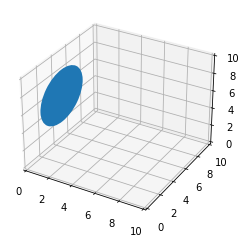

In [145]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Draw a circle on the x=0 'wall'
p = Circle((5, 5), 3)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="x")

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

plt.show()

In [146]:
# create a spherical gaussian blob
gaussian = sitk.GaussianSource(sitk.sitkUInt8,
    size = [100,100,80],
    sigma = [20,20,20],
    mean = [20,20,40],
    spacing = [.4, .4, 1.0])

# threshold to create a binary ball
ball = sitk.BinaryThreshold(gaussian, 150.0, 255.0, 63, 0)

sitk.WriteImage(ball, "ball.nii.gz")

In [154]:
radius = 3
sphere = rg.sphere(7, radius)
print(sphere.shape)
diam_sphere = diam_255
view(diam_sphere)
#view(diam_255)


(7, 7, 7)


Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [156]:
diam_sphere[11:18, 0:7, 8:15] = sphere
view(diam_sphere)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [208]:
for y in range(height-1):
    for x in range(width-1):
        for z in range(slices-1):
            diam_intensity = diam[z,y,x]
            if diam_intensity != 0:
#                 pos = (x, y, z)
                  print(x,y,z)
                  radius = round(diam_intensity)
                  print(radius)
#                 sphere = sphere(pos = vector(x, y, z), 
#                                 color = vector(diam[z,y,x], diam[z,y,x], diam[z,y,x]), 
#                                 radius = diam[z,y,x])
                  sphere = rg.sphere((radius*2)+1, radius)
#                   for xs in range(sphere.shape[0]):
#                     for ys in range(sphere.shape[0]):
#                         for zs in range(sphere.shape[0]):
#                             if sphere[xs, ys, zs]:
#                                 diam_255[]
#                                 sphere[xs, ys, zs] = radius
#                                 print(sphere[xs, ys, zs])
#                             else:
#                                 sphere[xs,ys,zs] = diam_255[zs, ys, xs]
            
                  print(sphere.shape)
                  print(sphere)
#                   print(diam_intensity[z-radius:z+radius, y-radius:y+radius, x-radius:x+radius].shape)
                  #print(diam[13:16, 2:5, 10:13])
                  diam_255[z-radius:z+radius+1, y-radius:y+radius+1, x-radius:x+radius+1] = sphere 
        #vtk spheresource

11 3 14
1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True False]
  [ True  True  True]
  [False  True False]]

 [[False False False]
  [False  True False]
  [False False False]]]
12 3 15
1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True False]
  [ True  True  True]
  [False  True False]]

 [[False False False]
  [False  True False]
  [False False False]]]
42 3 91
1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True False]
  [ True  True  True]
  [False  True False]]

 [[False False False]
  [False  True False]
  [False False False]]]
13 4 16
1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True False]
  [ True  True  True]
  [False  True False]]

 [[False False False]
  [False  True False]
  [False False False]]]
14 4 17
1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True F

1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True False]
  [ True  True  True]
  [False  True False]]

 [[False False False]
  [False  True False]
  [False False False]]]
45 17 37
2
(5, 5, 5)
[[[False False False False False]
  [False False False False False]
  [False False  True False False]
  [False False False False False]
  [False False False False False]]

 [[False False False False False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False False False False False]]

 [[False False  True False False]
  [False  True  True  True False]
  [ True  True  True  True  True]
  [False  True  True  True False]
  [False False  True False False]]

 [[False False False False False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False False False False False]]

 [[False False False False False]
  [False False False False False]
  [Fals

16 32 40
1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True False]
  [ True  True  True]
  [False  True False]]

 [[False False False]
  [False  True False]
  [False False False]]]
16 32 41
1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True False]
  [ True  True  True]
  [False  True False]]

 [[False False False]
  [False  True False]
  [False False False]]]
18 32 64
1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True False]
  [ True  True  True]
  [False  True False]]

 [[False False False]
  [False  True False]
  [False False False]]]
36 32 86
1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True False]
  [ True  True  True]
  [False  True False]]

 [[False False False]
  [False  True False]
  [False False False]]]
47 32 47
2
(5, 5, 5)
[[[False False False False False]
  [False False False False False]
  [False Fa

78 56 9
2
(5, 5, 5)
[[[False False False False False]
  [False False False False False]
  [False False  True False False]
  [False False False False False]
  [False False False False False]]

 [[False False False False False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False False False False False]]

 [[False False  True False False]
  [False  True  True  True False]
  [ True  True  True  True  True]
  [False  True  True  True False]
  [False False  True False False]]

 [[False False False False False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False  True  True  True False]
  [False False False False False]]

 [[False False False False False]
  [False False False False False]
  [False False  True False False]
  [False False False False False]
  [False False False False False]]]
89 56 80
1
(3, 3, 3)
[[[False False False]
  [False  True False]
  [False False False]]

 [[False  True False]
  [ True 

In [203]:
print(diam.max())
for y in range(height-1):
    for x in range(width-1):
        for z in range(slices-1):
            diam_intensity = diam[z,y,x]
            if diam_intensity != 0:
                print(diam_intensity)

3.0
1.0
1.4142135381698608
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.4142135381698608
1.0
1.0
1.0
1.4142135381698608
1.0
1.0
1.0
1.0
1.4142135381698608
1.0
1.0
1.4142135381698608
1.0
1.4142135381698608
1.0
1.4142135381698608
1.4142135381698608
1.0
1.0
1.0
1.4142135381698608
1.0
1.0
1.4142135381698608
1.0
1.0
1.4142135381698608
1.0
1.0
1.0
1.4142135381698608
1.0
1.0
1.0
1.0
1.4142135381698608
1.0
1.0
1.0
1.0
1.0
1.0
1.4142135381698608
1.0
1.0
1.0
1.0
1.0
1.4142135381698608
1.0
1.0
1.4142135381698608
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.7320507764816284
1.0
2.0
1.4142135381698608
2.0
1.4142135381698608
1.0
2.0
2.2360680103302
2.2360680103302
2.0
1.4142135381698608
2.0
2.0
1.7320507764816284
2.0
2.0
2.0
1.4142135381698608
1.0
1.0
1.0
1.0
1.0
1.4142135381698608
1.4142135381698608
1.7320507764816284
2.0
1.7320507764816284
1.4142135381698608
2.0
1.4142135381698608
2.0
2.0
1.0
2.0
2.0
2.0
2.0
2.0
1.7320507764816284
1.4142135381698608
2.0
2.0
1.7320507764816284
2.0
1.7320507764816284
1.4142135381

In [201]:
# for y in range(height-1):
#     for x in range(width-1):
#         for z in range(slices-1):
#             diam_intensity = diam[z,y,x]
#             if diam_intensity != 0:
# #                 pos = (x, y, z)
#                   print(x,y,z)
#                   radius = round(diam_intensity)
#                   print(radius)
#                   sphere = vtk.vtkSphereSource()
#                   sphere.SetCenter(x, y, z)
#                   sphere.SetRadius(diam_intensity)

#                   print(sphere.shape)
#                   print(diam_intensity[z-radius:z+radius, y-radius:y+radius, x-radius:x+radius].shape)
#                   print(diam[13:16, 2:5, 10:13])
#                   diam_255[z-radius:z+radius+1, y-radius:y+radius+1, x-radius:x+radius+1] = sphere

# Calculate the node's deformed position
#     newX = node.X + scale_factor*(node.DX[combo_name])
#     newY = node.Y + scale_factor*(node.DY[combo_name])
#     newZ = node.Z + scale_factor*(node.DZ[combo_name])

    # Generate a sphere for the node
#     sphere = vtk.vtkSphereSource()
#     sphere.SetCenter(diam11, 3, 14)
#     sphere.SetRadius(1.0)

#     # Set up a mapper for the node
#     mapper = vtk.vtkPolyDataMapper()
#     mapper.SetInputConnection(sphere.GetOutputPort())

#     # Set up an actor for the node
#     self.actor = vtk.vtkActor()
#     self.actor.GetProperty().SetColor(255, 255, 0) # Yellow
#     self.actor.SetMapper(mapper)
        
#     # Create the text for the node label
#     label = vtk.vtkVectorText()
#     label.SetText(node.Name)

#     # Set up a mapper for the node label
#     lblMapper = vtk.vtkPolyDataMapper()
#     lblMapper.SetInputConnection(label.GetOutputPort())

#     # Set up an actor for the node label
#     self.lblActor = vtk.vtkFollower()
#     self.lblActor.SetMapper(lblMapper)
#     self.lblActor.SetScale(text_height, text_height, text_height)
#     self.lblActor.SetPosition(newX + 0.6*text_height, newY + 0.6*text_height, newZ)
#     self.lblActor.GetProperty().SetColor(255, 255, 0) # Yellow


11 3 14
1


NameError: name 'vtk' is not defined

In [200]:
view(diam_255)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…